In [ ]:
import pandas as pd
import numpy as np
from scipy import integrate
import re
import matplotlib.pyplot as plt

In [ ]:
kal_1 = np.array([2, 0, 1, 1, 0, 2, 1, 1])
kal_2 = np.array([2, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
cosine_similarity = kal_1 @ kal_2 / (np.linalg.norm(kal_1) * np.linalg.norm(kal_2))
cosine_similarity

0.8215838362577491

**Task 2**

In [ ]:
def data_preprocess(data):
   long = []
   lat = []
   for row in data['state_geom'][0].split(', '):
     row = re.sub('MULTIPOLYGON','',row)
     row = re.sub('POLYGON','',row)
     row = re.sub(r'\(','',row)
     row = re.sub(r'\)','',row)
     long.append(float(row.split(' ')[0]))
     lat.append(float(row.split(' ')[1]))
   return pd.DataFrame({'long':long,'lat':lat}).sort_values('long',ascending=True)

In [ ]:
df = pd.read_csv('/content/bquxjob_110d2979_18248be3258.csv')
df

,geo_id,region_code,division_code,state_fips_code,state_gnis_code,state,state_name,lsad_code,mtfcc_feature_class_code,functional_status,area_land_meters,area_water_meters,int_point_lat,int_point_lon,int_point_geom,state_geom
0,8,4,8,8,1779779,CO,Colorado,0,G4000,A,268419875371,1184637800,38.993848,-105.508317,POINT(-105.5083165 38.9938482),"POLYGON((-109.050949 40.222647, -109.050952 40..."


In [ ]:
df_clean = data_preprocess(data = df)
df_clean

,long,lat
759,-109.060204,38.278238
760,-109.060187,38.275528
751,-109.060185,38.318670
743,-109.060180,38.344908
659,-109.060176,38.462300
...,...,...
3038,-102.041585,37.644282
2941,-102.041585,37.382598
3039,-102.041583,37.650403
3040,-102.041582,37.654495


In [ ]:
mid = ((df_clean['lat'].max() - df_clean['lat'].min()) / 2) + df_clean['lat'].min()
mid

38.9979465

In [ ]:
northern = df_clean[df_clean['lat'] >= mid]
southern = df_clean[df_clean['lat'] < mid]

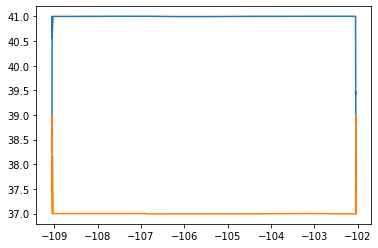

In [ ]:
plt.plot(northern['long'], northern['lat'])
plt.plot(southern['long'], southern['lat'])
plt.show()

In [ ]:
utara = integrate.trapz(northern['lat'], northern['long']) # trapz(Y, X)
selatan = integrate.trapz(southern['lat'], southern['long'])

utara - selatan

27.54223746015316